In [15]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
dataset = pd.read_csv('Mall_Customers.csv',index_col = 'CustomerID')
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


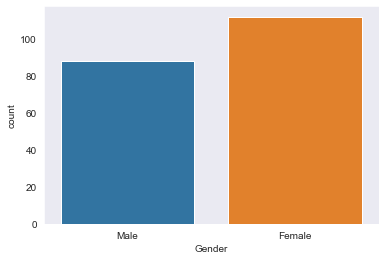

In [17]:
# Distribution of Gender

sns.set_style('dark')
sns.countplot(data = dataset,x= 'Gender')

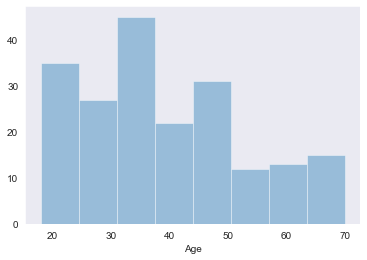

In [18]:
# Histogram of Ages

sns.distplot(a = dataset.loc[:,'Age'],kde = False)

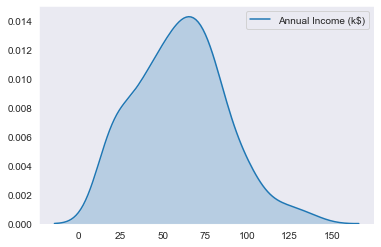

In [19]:
# Distribution of Annual Income in Thousands of Dollars

sns.kdeplot(data = dataset.loc[:,'Annual Income (k$)'],shade = True)

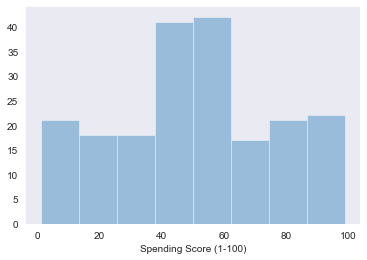

In [20]:
# Histogram of Spending Score

sns.distplot(a = dataset.loc[:,'Spending Score (1-100)'],kde = False)

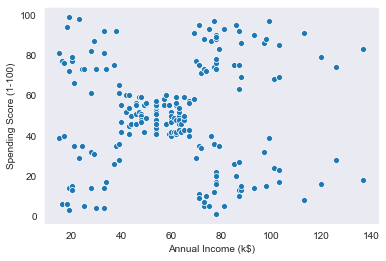

In [21]:
# Scatterplot of Annual Income vs Spending Score

sns.scatterplot(x = dataset.loc[:,'Annual Income (k$)'],y = dataset.loc[:,'Spending Score (1-100)'])

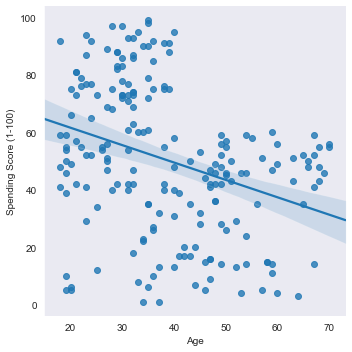

In [22]:
# Plot of Age vs Spending Score

sns.lmplot(x = 'Age',y = 'Spending Score (1-100)',data = dataset)

We can see a trend of decreasing spending score with increasing age.

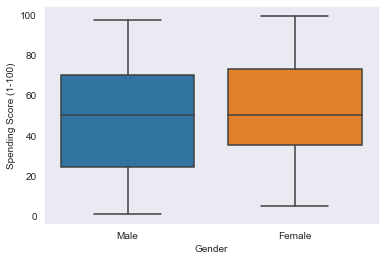

In [23]:
# Comparison of Spending Score between male and female

sns.boxplot(x = dataset.loc[:,'Gender'],y = dataset.loc[:,'Spending Score (1-100)'])

We can see a slightly higher average spending score in females than the one in males.

In [24]:
X = dataset.iloc[:,2:4].values

THE ELBOW METHOD

The main goal behind cluster partitioning methods like k-means is to define the clusters such that the intra-cluster variation stays minimum.

First, we calculate the clustering algorithm for several values of k. This can be done by creating a variation within k from 1 to 10 clusters. We then calculate the total intra-cluster sum of square (iss). Then, we proceed to plot iss based on the number of k clusters. This plot denotes the appropriate number of clusters required in our model

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,n_init = 10,random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

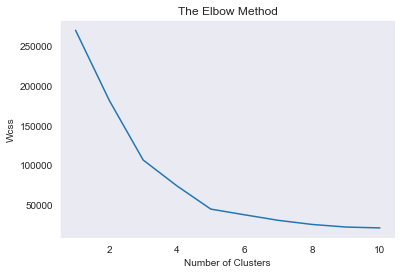

In [26]:
# Plotting the no. of clusters vs intra cluster sum of squares

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show() 

In the elbow method, we get our optimal number of clusters by observing the point where the slope of our curve changes sharply, that is the point where we get a elbow like shape.
In our case , we can observe that this point is at 5 clusters.

In [27]:
# Fitting K-means with 5 clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300,n_init = 10,random_state =0)
y_kmeans = kmeans.fit_predict(X)

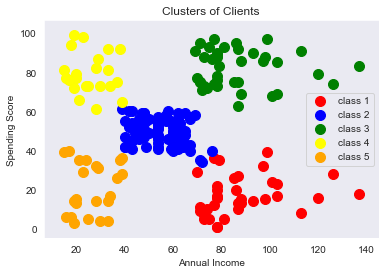

In [28]:
# Plotting annual income vs spending score

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,color='red',label = 'class 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,color='blue',label = 'class 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,color='green',label = 'class 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,color='yellow',label = 'class 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,color='orange',label = 'class 5')
plt.title("Clusters of Clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

From the 5 clusters , we can interpret the following classes :-

class 1 - High annual income but low spending score.
class 2 - Average annual income with average spending score
class 3 - High annual income with high spending score
class 4 - Low annual income but high spending score
class 5 - Low annual income with low spending score